In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from src.dataset_generator import DatasetGenerator

selected_scripts = ["Hieroglyph", "Proto-Sinaitic", "Phoenician", "Ancient North-Arabian",
                        "Ancient South-Arabian", "Ge'ez", "Paleo-Hebrew", "Samaritan", "Aramaic", "Syriac",
                        "Hebrew", "Nabataean", "Arabic"]
font_encoding_file = "data/encoding/dotless_encoding.csv"
fonts_dir = "data/fonts/"


/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/src/dataset_generator.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.scripts, rotation=45, ha='right')


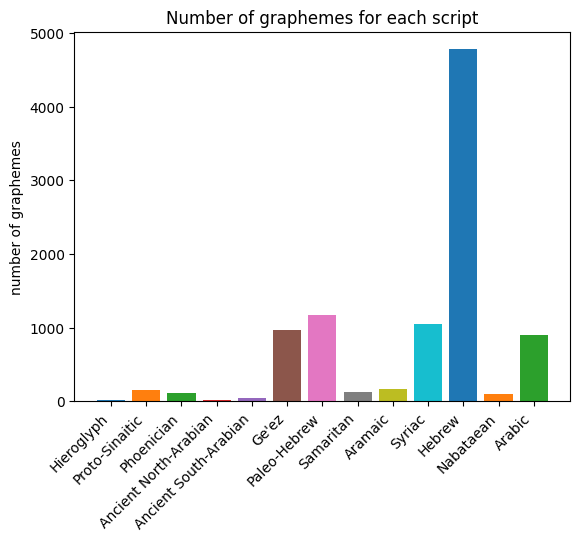

In [3]:
dataset_dir = "datasets/base_dataset/"
dataset_generator = DatasetGenerator(font_encoding_file, dataset_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=False,
                                     rotation_dist=(0,0),
                                     sizes=[22],
                                     max_augmentations=1)
dataset_generator.plot_graphemes_count()

In [4]:
dataset_generator.generate_dataset()

Output directory datasets/base_dataset/ already exists. Exiting...


In [5]:
from src.datasets import GraphemesDataset
base_dataset = GraphemesDataset(dataset_dir, by_letter='aleph', test_size=1)

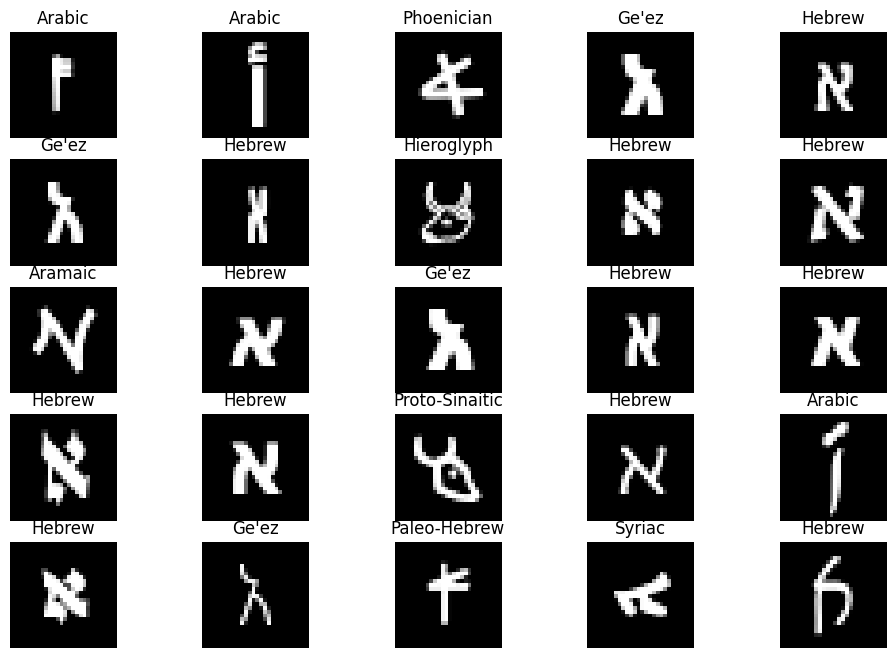

In [6]:
# plot the first 25 images in the train dataset
fig, axes = plt.subplots(5, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    image, label = base_dataset[i]
    ax.imshow(image[:, :, 0], cmap='gray')
    ax.set_title(base_dataset.classes[label])
    ax.axis('off')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def gather_data_by_class(dataset, M, n_classes=13):
    class_data = {}
    for image, label in dataset:
        label = dataset.classes[label]
        if label not in class_data:
            class_data[label] = []
        if len(class_data[label]) < M:
            class_data[label].append(image)
        if all(len(images) >= M for images in class_data.values()):
            break
    return class_data

def plot_images_in_grid(class_data, M):
    num_classes = len(class_data)
    num_rows = len(class_data[list(class_data.keys())[0]])
    num_cols = num_classes

    fig, ax = plt.subplots(1, 1, figsize=(12, M + 2))
    ax.set_facecolor('black')
    ax.set_xticks([])
    ax.set_yticks([])

    for i, (label, images) in enumerate(class_data.items()):
        x, y = (i + 0.5) / num_classes, 1.01
        ax.text(x, y, label, fontsize=16, ha='center', va='bottom', rotation=90)
        for j in range(min(num_rows, len(images))):
            image = images[j]
            ax_index = j * num_classes + i + 1
            ax_ij = fig.add_subplot(num_rows, num_cols, ax_index)
            ax_ij.imshow(image[:, :, 0], cmap='gray')
            ax_ij.axis('off')

    plt.tight_layout()
    plt.show()


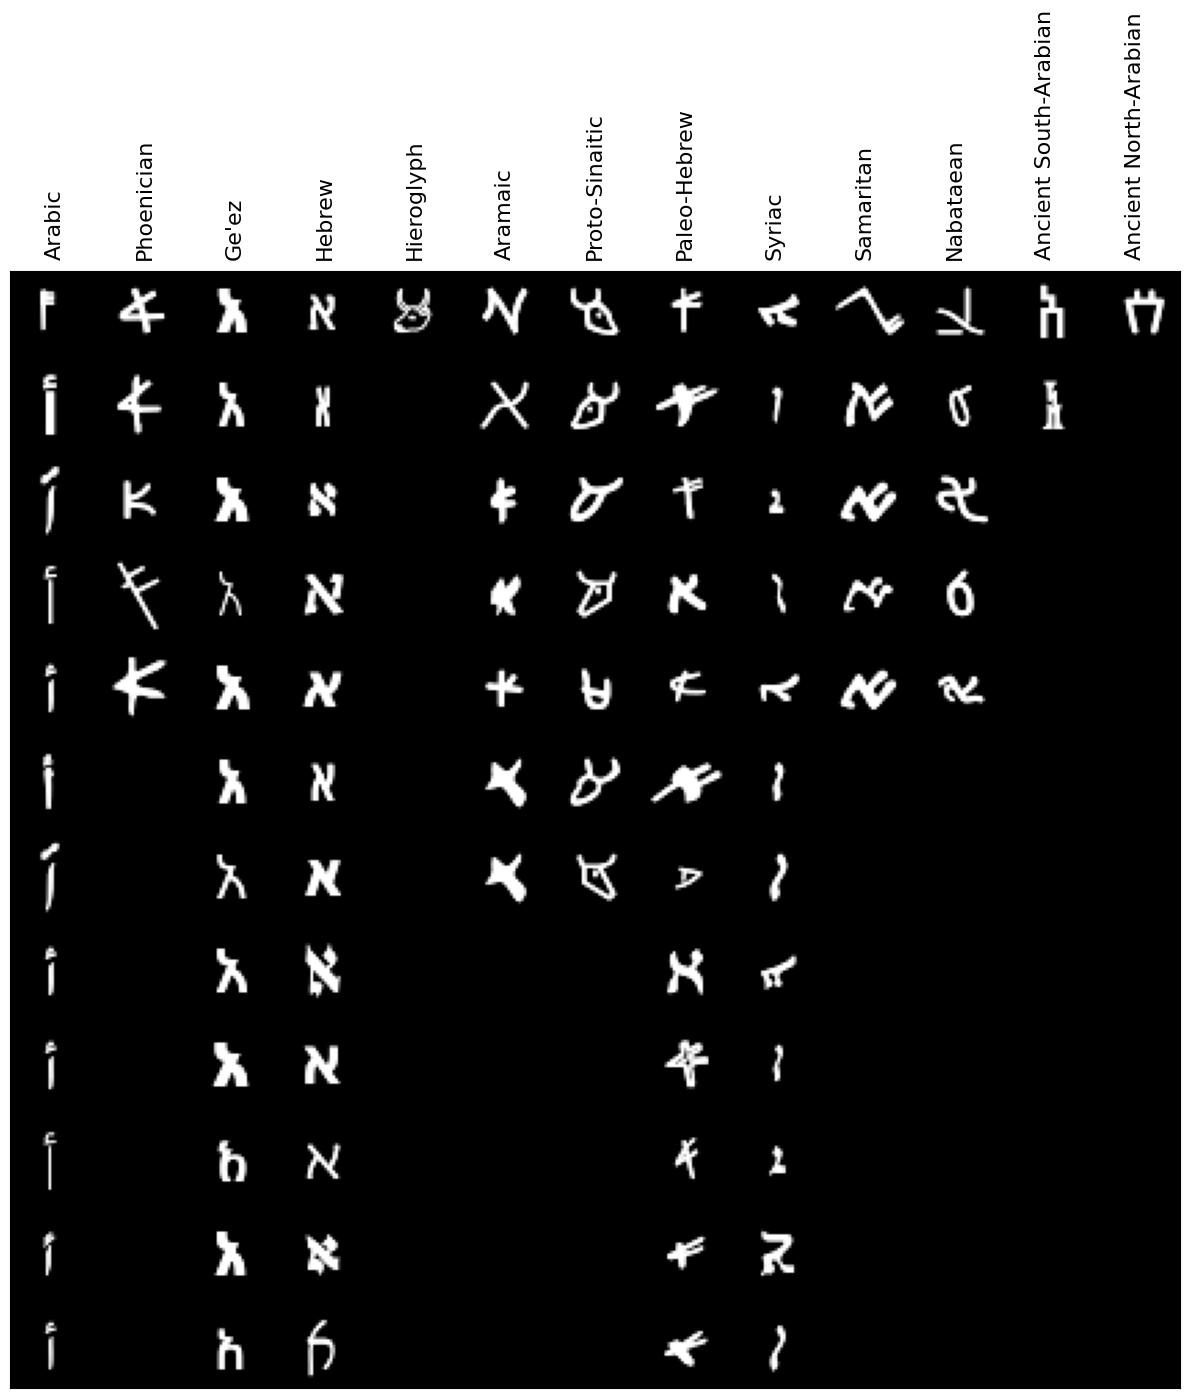

In [8]:
M = 12
class_data = gather_data_by_class(base_dataset, M, len(base_dataset.classes))
plot_images_in_grid(class_data, M)

Output directory datasets/moderate_dataset/ already exists. Exiting...


/Users/bensa/MLDS/Deep Learning/Final Project/Deep Graphemics/src/dataset_generator.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.scripts, rotation=45, ha='right')


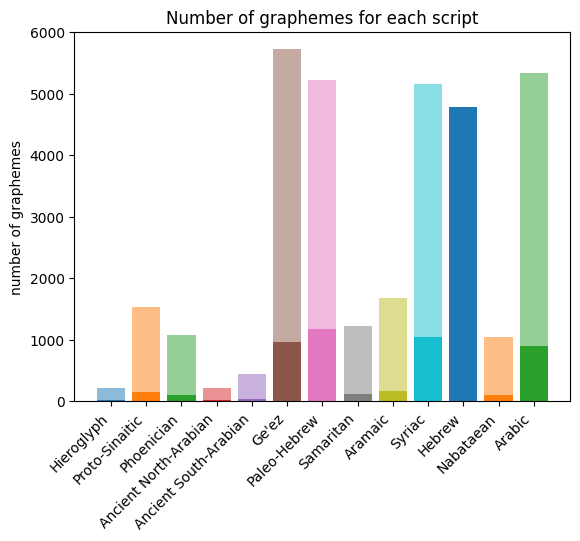

In [9]:
# vary sizes, allow translation and slight rotation (mean 0, std 5)
# and allow up to 10 augmentations per grapheme
dataset_dir = "datasets/moderate_dataset/"
dataset_generator = DatasetGenerator(font_encoding_file, dataset_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=True,
                                     rotation_dist=(0,5),
                                     sizes=range(20, 26),
                                     max_augmentations=10)
dataset_generator.generate_dataset()
dataset_generator.plot_graphemes_count()
moderate_dataset = GraphemesDataset(dataset_dir, by_letter='aleph', test_size=1)

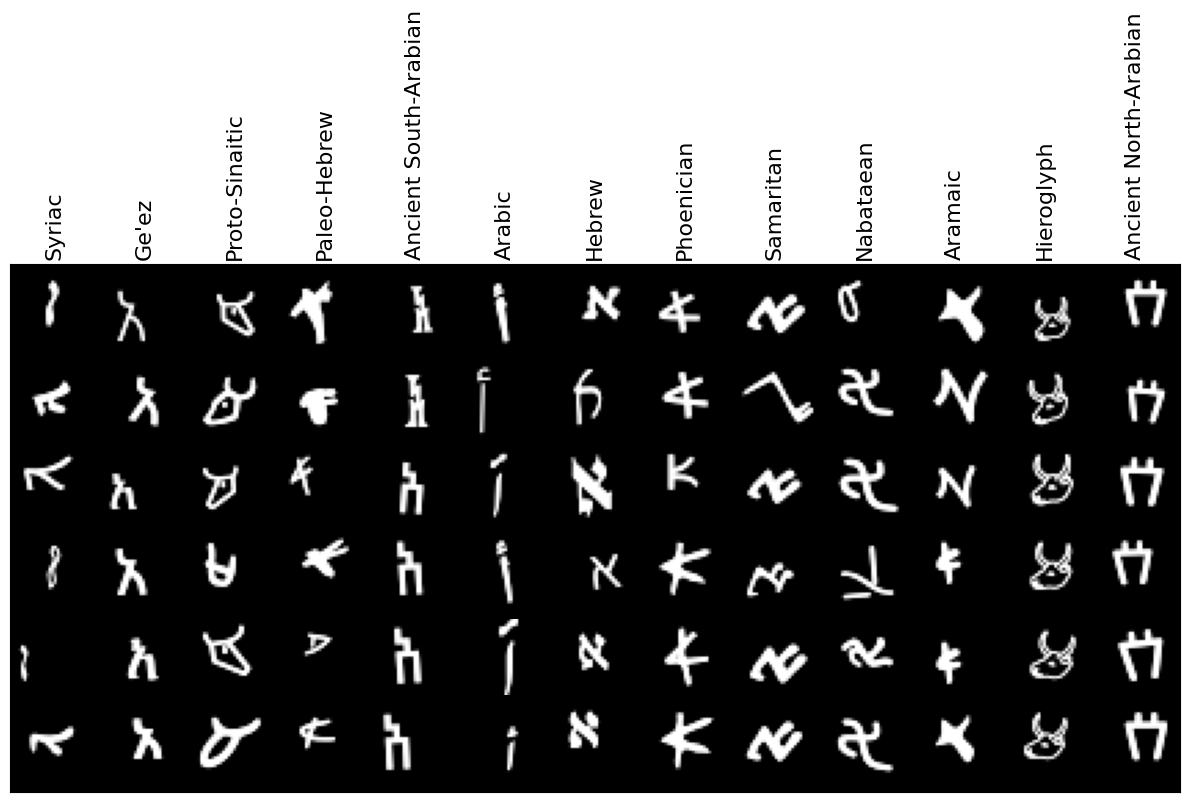

In [10]:
M = 6
class_data = gather_data_by_class(moderate_dataset, M, len(moderate_dataset.classes))
plot_images_in_grid(class_data, M)

In [11]:
dataset_dir = "datasets/rotation_dataset/"
dataset_generator = DatasetGenerator(font_encoding_file, dataset_dir, fonts_dir,
                                     selected_scripts=selected_scripts,
                                     translate=True,
                                     rotation_dist=(0,45),
                                     sizes=range(20, 26),
                                     max_augmentations=10)
dataset_generator.generate_dataset()
rotations_dataset = GraphemesDataset(dataset_dir, by_letter='aleph', test_size=1)

Output directory datasets/rotation_dataset/ already exists. Exiting...


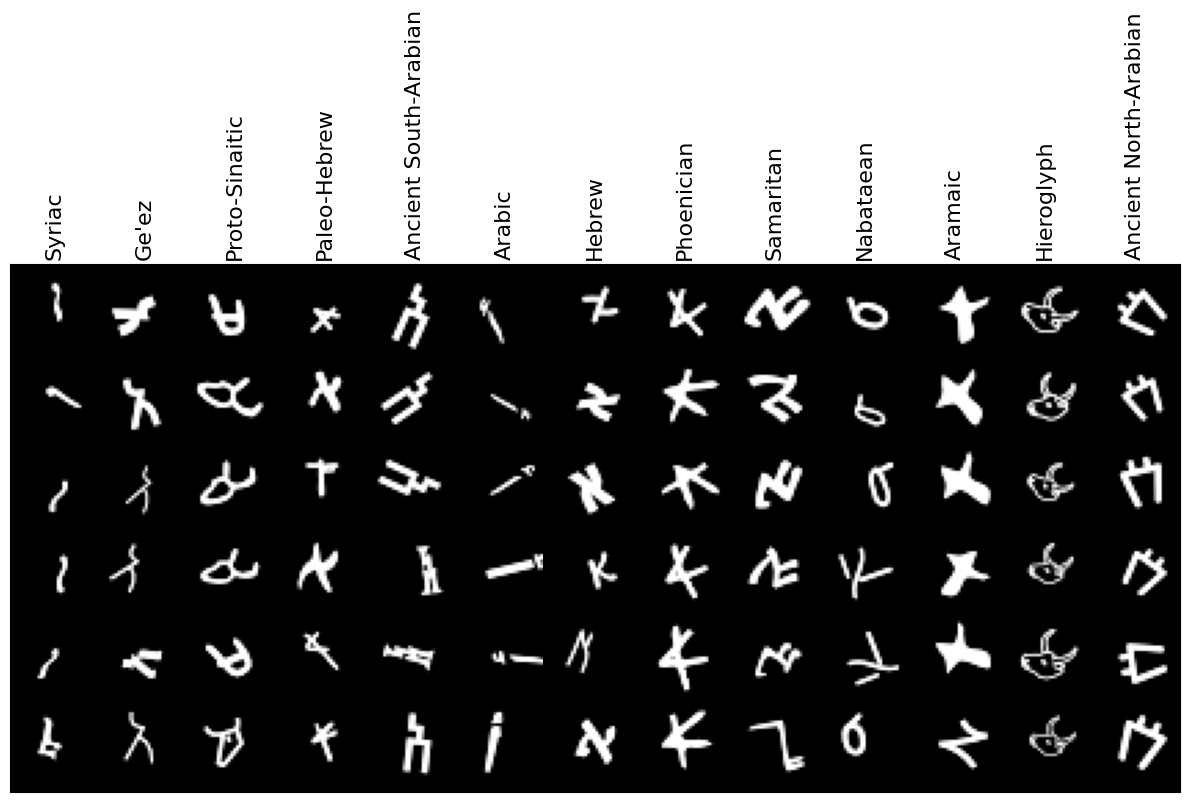

In [12]:
M = 6
class_data = gather_data_by_class(rotations_dataset, M, len(rotations_dataset.classes))
plot_images_in_grid(class_data, M)